# Renaming Windows Files Using Python: Part 2
If you've renamed your files once, as per the previous tutorial, you'll be interested to know how to do it again... and again... and again...

Let's dive in!

First we need to read in our existing Excel file to *know* what the file renaming status is, as well as check the folder for new files.

In [1]:
import os
import pandas as pd

# file folder
pathToFolder = 'C:/Users/big-turtle/Desktop/MIT_DL'
# move to the file folder
os.chdir(pathToFolder)

# name of Excel sheet
excel = 'MyFiles.xlsx'
dfOld = pd.read_excel(excel, index_col = 0) 
dfOld

,name_before,name_after,rename_status
0,1.JPG,abc_1.JPG,yes
1,6S191_MIT_DeepLearning_L1.pdf,abc_6S191_MIT_DeepLearning_L1.pdf,yes
2,6S191_MIT_DeepLearning_L2.pdf,abc_6S191_MIT_DeepLearning_L2.pdf,yes


For the purpose of this demonstration I've copied a bunch of new files into the folder.

In [2]:
# file check
files = os.listdir()
files

['1 - Copy (2).JPG',
 '1 - Copy (3).JPG',
 '1 - Copy (4).JPG',
 '1 - Copy.JPG',
 'abc_1.JPG',
 'abc_6S191_MIT_DeepLearning_L1.pdf',
 'abc_6S191_MIT_DeepLearning_L2.pdf',
 'MyFiles.xlsx']

Provided that files in one folder are renamed by the same convention, we can filter out not-prefixed file names, thus finding the new files.

In [3]:
prefix = 'abc_'

# selects the file name that doesn't have the prefix, excluding the Excel sheet
filesNew = [files[n] for n in range(len(files)) if prefix not in files[n] and files[n] != excel]
filesNew

['1 - Copy (2).JPG', '1 - Copy (3).JPG', '1 - Copy (4).JPG', '1 - Copy.JPG']

As previously, we need to create prefixed file names for the new files.

In [4]:
# creates new file names
filesAfter = [prefix + filesNew[n] for n in range(len(filesNew))]

df = pd.DataFrame({'name_before': filesNew, 
                   'name_after': filesAfter, 
                   'rename_status': 'no'})
df

,name_before,name_after,rename_status
0,1 - Copy (2).JPG,abc_1 - Copy (2).JPG,no
1,1 - Copy (3).JPG,abc_1 - Copy (3).JPG,no
2,1 - Copy (4).JPG,abc_1 - Copy (4).JPG,no
3,1 - Copy.JPG,abc_1 - Copy.JPG,no


Just as previously, we either rename the files or print out a cute error!

In [5]:
for n in range(len(filesNew)):
    try:
        # if file name equals name_before, rename file to name_after and change rename_status to yes
        if filesNew[n] == df['name_before'][n]:
            os.rename(filesNew[n], df['name_after'][n])
            df['rename_status'][n] = 'yes'
    except OSError as e:
        print("Error Nb.", e.errno, "No files to rename :(")
        pass

df

,name_before,name_after,rename_status
0,1 - Copy (2).JPG,abc_1 - Copy (2).JPG,yes
1,1 - Copy (3).JPG,abc_1 - Copy (3).JPG,yes
2,1 - Copy (4).JPG,abc_1 - Copy (4).JPG,yes
3,1 - Copy.JPG,abc_1 - Copy.JPG,yes


Now we'll just glue the two dataframes together and rewrite the Excel file. Funky fresh, but not particularly elegant or fast.

In [6]:
df = df.append(dfOld, ignore_index = True)
df

,name_before,name_after,rename_status
0,1 - Copy (2).JPG,abc_1 - Copy (2).JPG,yes
1,1 - Copy (3).JPG,abc_1 - Copy (3).JPG,yes
2,1 - Copy (4).JPG,abc_1 - Copy (4).JPG,yes
3,1 - Copy.JPG,abc_1 - Copy.JPG,yes
4,1.JPG,abc_1.JPG,yes
5,6S191_MIT_DeepLearning_L1.pdf,abc_6S191_MIT_DeepLearning_L1.pdf,yes
6,6S191_MIT_DeepLearning_L2.pdf,abc_6S191_MIT_DeepLearning_L2.pdf,yes


It's late and finally, we can add our new files and keep tracking changes aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa sweet, victory-ish.

In [7]:
with pd.ExcelWriter(excel) as writer:  
    df.to_excel(writer, sheet_name='Sheet_name_1')
    writer.save()

This is what our Excel file will look like. Handy-dandy for a quick progress report.
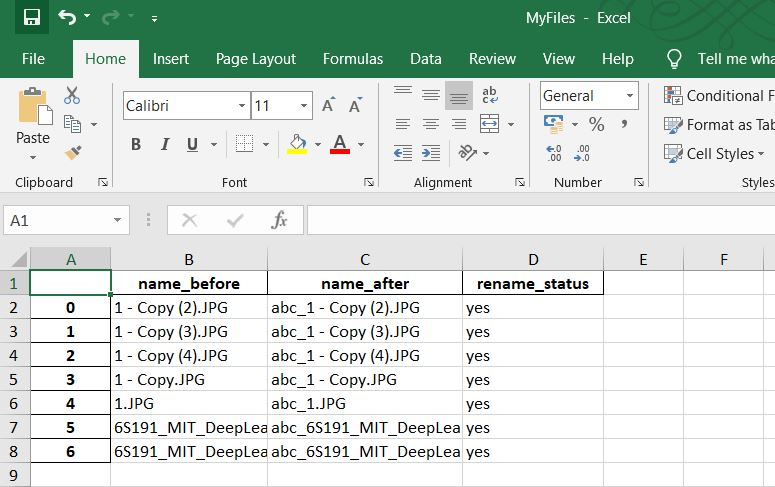